<a href="https://colab.research.google.com/github/ladiff777/Computer-Vision_7th-sem/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# system environment
import sys
# I/O
import os
# OpenCV
import cv2
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# image processing library
import matplotlib.image as mpimg
# date and time
import datetime

# import warnings
import warnings
# suppress warnings
warnings.filterwarnings("ignore")

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# OpenCV
print("OpenCV version : {0} ".format(cv2.__version__))
# numpy
print("Numpy version  : {0}".format(np.__version__))

Python version : 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0] 
OpenCV version : 4.8.0 
Numpy version  : 1.23.5


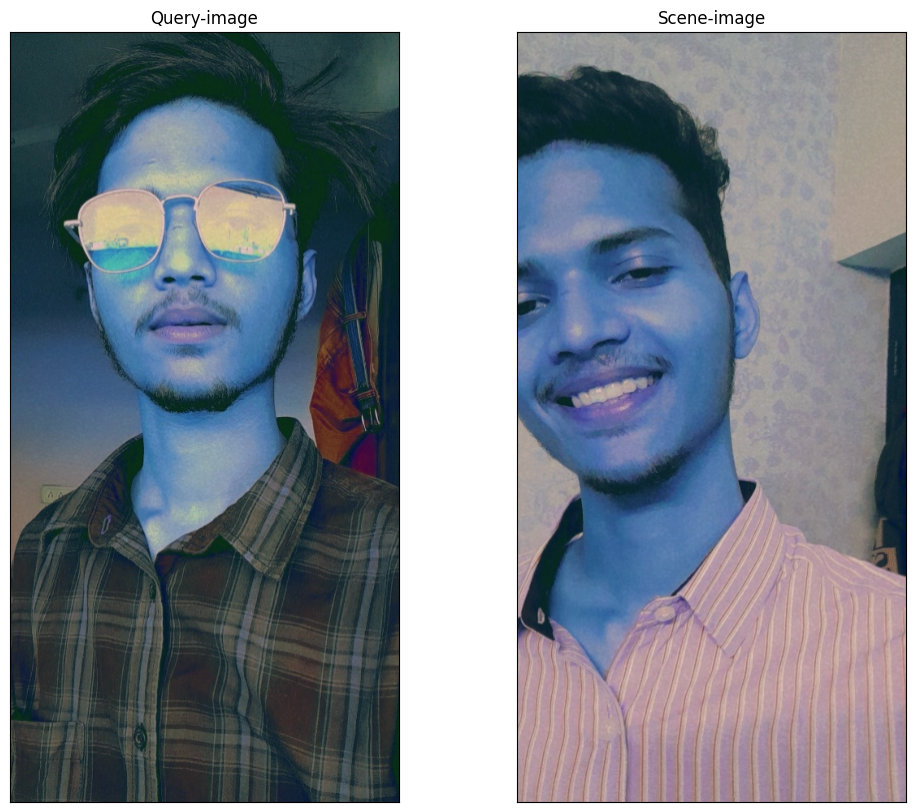

In [3]:
#-----------------------------------------------------------------------
# 2.1) Read the query-image
#-----------------------------------------------------------------------
# The input query image file name
query_img_file_path_name = os.path.join("sample_data","/content/Snapchat-179720468.jpg")
# read the input query-image
img_query = cv2.imread(query_img_file_path_name)

# check if the query-image is read successfully
if img_query is None:
    sys.exit("Could not read the image file: " + query_img_file_path_name)

# check if it is grayscale image, if so convert it to RGB by
# duplicating the channel
if (len(img_query.shape) == 2):
  mg_query = np.uint8(cv2.merge([mg_query,mg_query,mg_query]))

# check if it is color image, if so convert it to grayscale
if (len(img_query.shape) > 2):
    gray_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2GRAY)
else: # make a copy of the query-image
    gray_query = img_query.copy()

#-----------------------------------------------------------------------
# 2.2) Read the scene image
#-----------------------------------------------------------------------
# The input scene image file name
scene_img_file_path_name = os.path.join("sample_data","/content/Snapchat-183419725.jpg")
# read the input scene-image
img_scene = cv2.imread(scene_img_file_path_name)

# check if the scene-image is read successfully
if img_scene is None:
    sys.exit("Could not read the image file: " + scene_img_file_path_name)

# check if it is grayscale image, if so convert it to RGB by
# duplicating the channel
if (len(img_scene.shape) == 2):
  mg_scene = np.uint8(cv2.merge([mg_scene,mg_scene,mg_scene]))

# check if it is color image, if so convert it to grayscale
if (len(img_scene.shape) > 2):
    gray_scene = cv2.cvtColor(img_scene, cv2.COLOR_BGR2GRAY)
else: # make a copy of the scene-image
    gray_scene = img_scene.copy()

#-----------------------------------------------------------------------
# 2.3) Display the scene and the query images:
#-----------------------------------------------------------------------
# create a figure
plt.figure("Input scene and query images",figsize=(12,10))
#-----------------------------------------------------------------------
# 2.3.1) display the input query-image
#-----------------------------------------------------------------------
# display the original query-image
plt.subplot(121)
plt.title("Query-image", fontsize = 12)
plt.xticks([]), plt.yticks([])
# display the query-image
# - if the image is RGB
if (len(img_query.shape) > 2):
    plt.imshow(img_query);
else: # for grayscale image
    plt.imshow(img_query, cmap='gray');
#-----------------------------------------------------------------------
# 2.3.2) display the input scene-image
#-----------------------------------------------------------------------
# create a figure
plt.figure("Input scene and query images",figsize=(12,10))
# display the original scene-image
plt.subplot(122)
plt.title("Scene-image", fontsize = 12)
plt.xticks([]), plt.yticks([])
# display the scene image
# - if the image is RGB
if (len(img_scene.shape) > 2):
    plt.imshow(img_scene);
else: # for grayscale image
    plt.imshow(img_scene, cmap='gray');

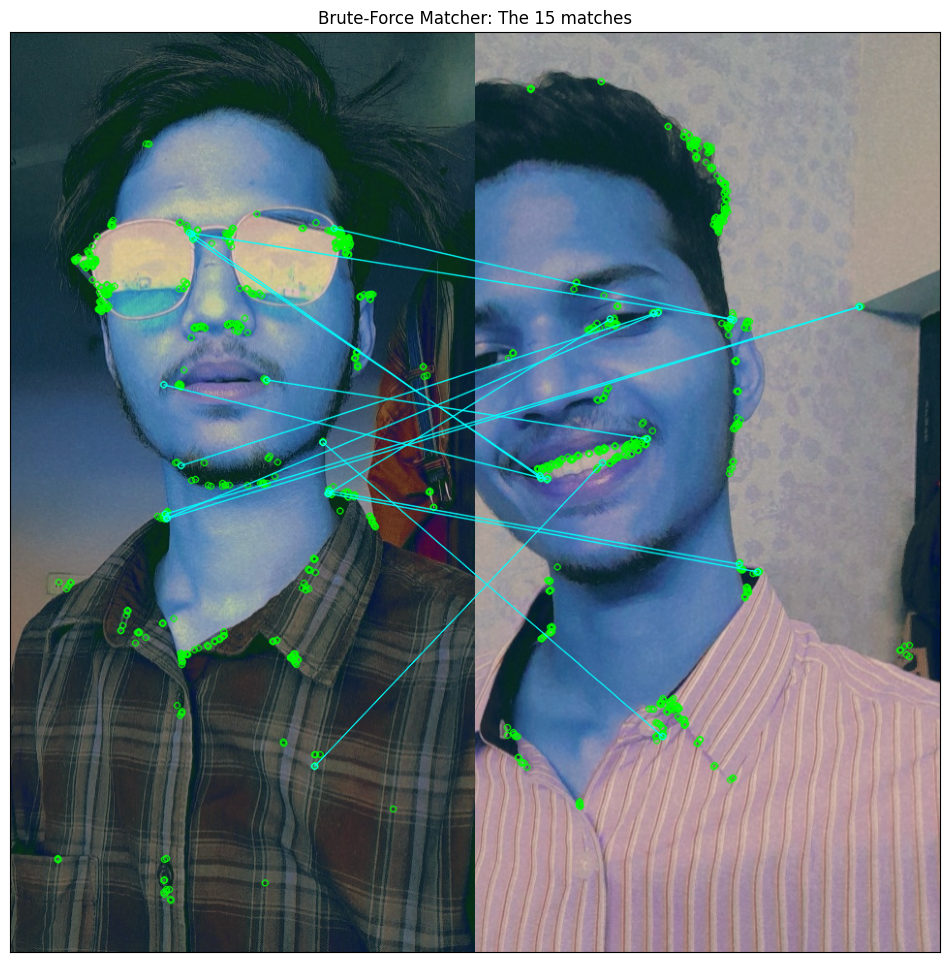

In [4]:
#=================================================================
# 3) Brute-Force Feature Matcher
#=================================================================
# Step 1: Detect the features from the scene and query
#         images:
#-----------------------------------------------------------------
#         - We compute the ORB features
#         - One may experiment with computing other features
#           such as Harris corners, FAST, BRIEF, etc.
#-----------------------------------------------------------------
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
# - for the query image
kp_query, des_query = orb.detectAndCompute(gray_query,None)
# - for the scene image
kp_scene, des_scene = orb.detectAndCompute(gray_scene,None)

#-----------------------------------------------------------------
# Step 2: Match the scene and query images features using the
#         Brute-Force Matcher.
#-----------------------------------------------------------------
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des_query,des_scene)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

#-----------------------------------------------------------------
# Step 3: Visualize the matches
#-----------------------------------------------------------------
# visualization preferences parameters
draw_params = dict(matchColor = (0,255,255),  # matching-lines color
                   singlePointColor = (0,255,0), #  keypoints color
                   flags = cv2.DrawMatchesFlags_DEFAULT) # show kepoints and matching lines
# Draw first 15 matches.
img3 = cv2.drawMatches(img_query,kp_query,img_scene,kp_scene,matches[:15],None,**draw_params)
# create the figure
plt.figure("BFMatcher - Best Match",figsize=(12,16))
plt.subplot(111)
plt.title("Brute-Force Matcher: The 15 matches", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(img3);

ValueError: ignored

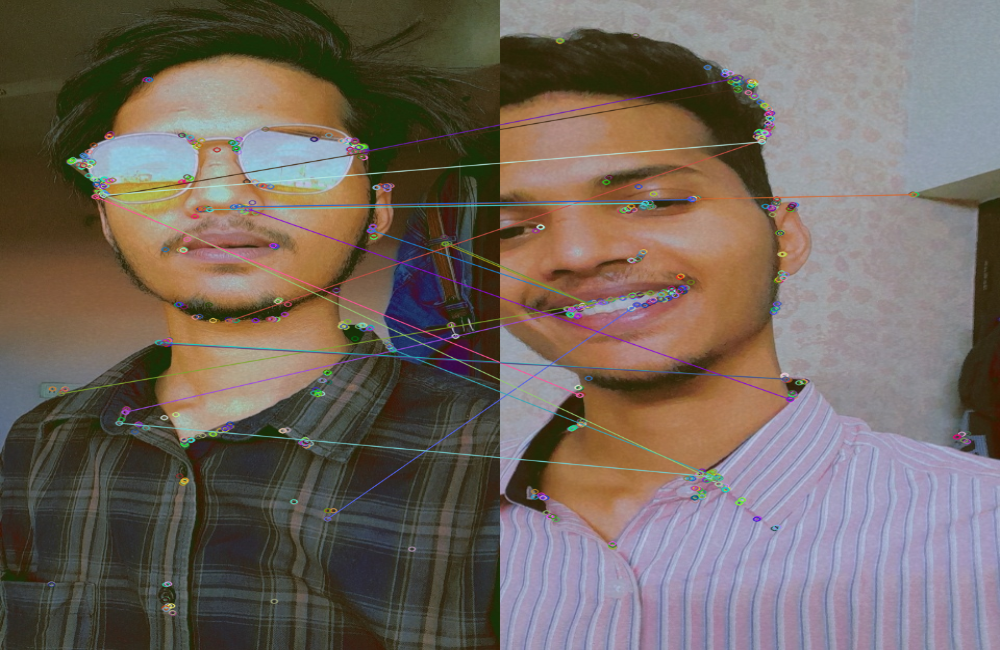

-1

In [16]:
import numpy as np
import cv2
#import cv2_imshow
from google.colab.patches import cv2_imshow


# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg
query_img = cv2.imread('/content/Snapchat-179720468.jpg')
train_img = cv2.imread('/content/Snapchat-183419725.jpg')

# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)

final_img = cv2.resize(final_img, (1000,650))

# Show the final image
#cv2.imshow("Matches", final_img)
img = cv2.imread('Matches', cv2.IMREAD_UNCHANGED)
cv2_imshow(final_img)
cv2.waitKey(3000)
